In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle

In [2]:
with open('../../genIII_data/JLab/Beam/Beam1-5_list.txt') as f:
    lines = f.read().split('\n')
tags = None
IDs=[]
layers=[]
channels =[]
din={}
for line in lines:
    if line[:2]=="//" or len(line)==0:
        continue

    if tags is None:
        tags = line.split()
        tags=tags[-3:]
        continue;

    split = line.split()
    layer, channel, LG, HG = split[0:4]

    ID=int(layer)*64+int(channel)

    if ID not in IDs:
        din[f"{ID}_LG"] = []
        din[f"{ID}_HG"] = []
        IDs.append(ID)
    din[f"{ID}_LG"].append(float(LG))
    din[f"{ID}_HG"].append(float(HG))

In [3]:
print(len(din["0_LG"]))

91323


In [22]:
def configure_plotting():
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    plt.rcParams['savefig.bbox'] = 'tight'
    hep.style.use(hep.style.CMS)


def process_channel(data, channel_key, ax):
    data = np.array(data[channel_key])
    counts, bin_edges = np.histogram(data, bins=30, range=[0, 8000])
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    errors = np.sqrt(counts)

    # Plot raw data
    ax.errorbar(bin_centers, counts, yerr=errors, fmt='o', label=channel_key)

    ax.set_yscale('log')
    ax.legend()
    ax.set_ylim(1, 50000)


# Analyze all channels for a given CAEN unit and return MIP values
def analyze_caen_unit(din, caen_unit):
    num_channels = 64
    num_cols = 8
    num_rows = 8
    configure_plotting()
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30), sharey=True, sharex=True)
    axes = axes.flatten()

    for i in range(num_channels):
        channel_key = f"{i + (64 * caen_unit)}_LG"
        process_channel(din, channel_key, axes[i])

        if i % num_cols == 0:
            axes[i].set_ylabel('Count')
        if i >= (num_rows - 1) * num_cols:
            axes[i].set_xlabel('ADC')

    plt.tight_layout(pad=0.0)
    plt.tight_layout(rect=[0, 0, 1.5, 1])
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

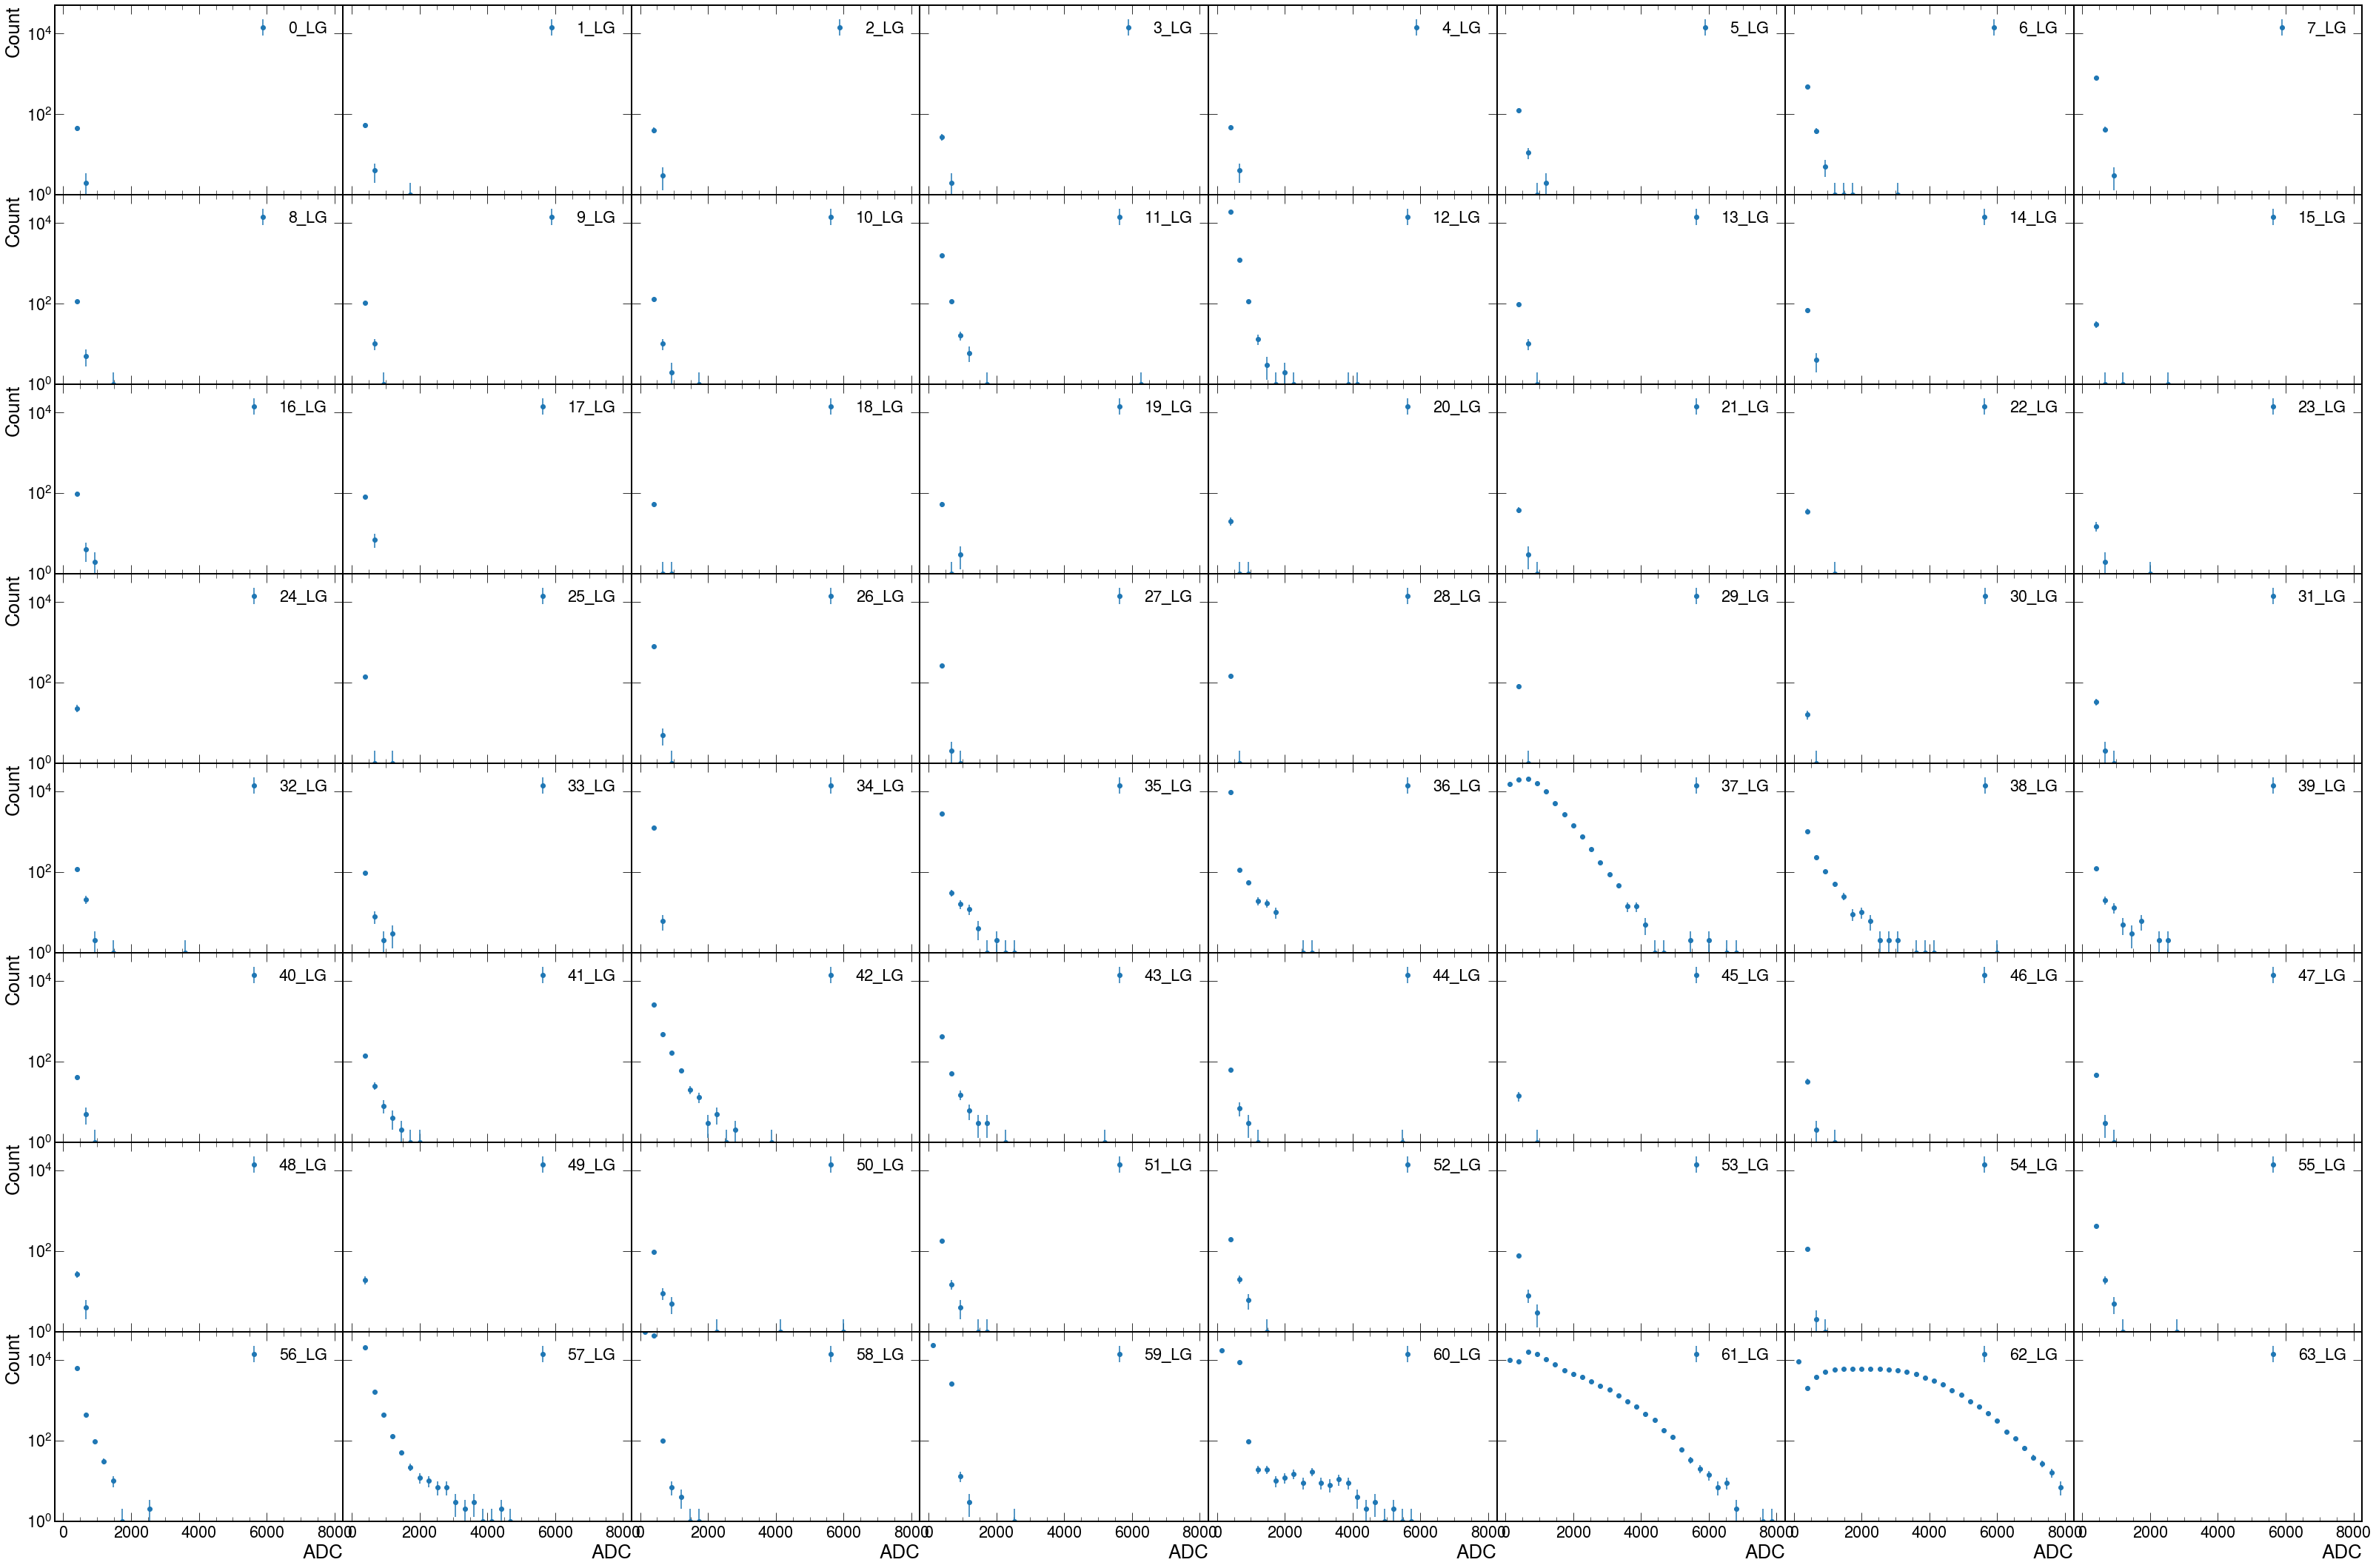

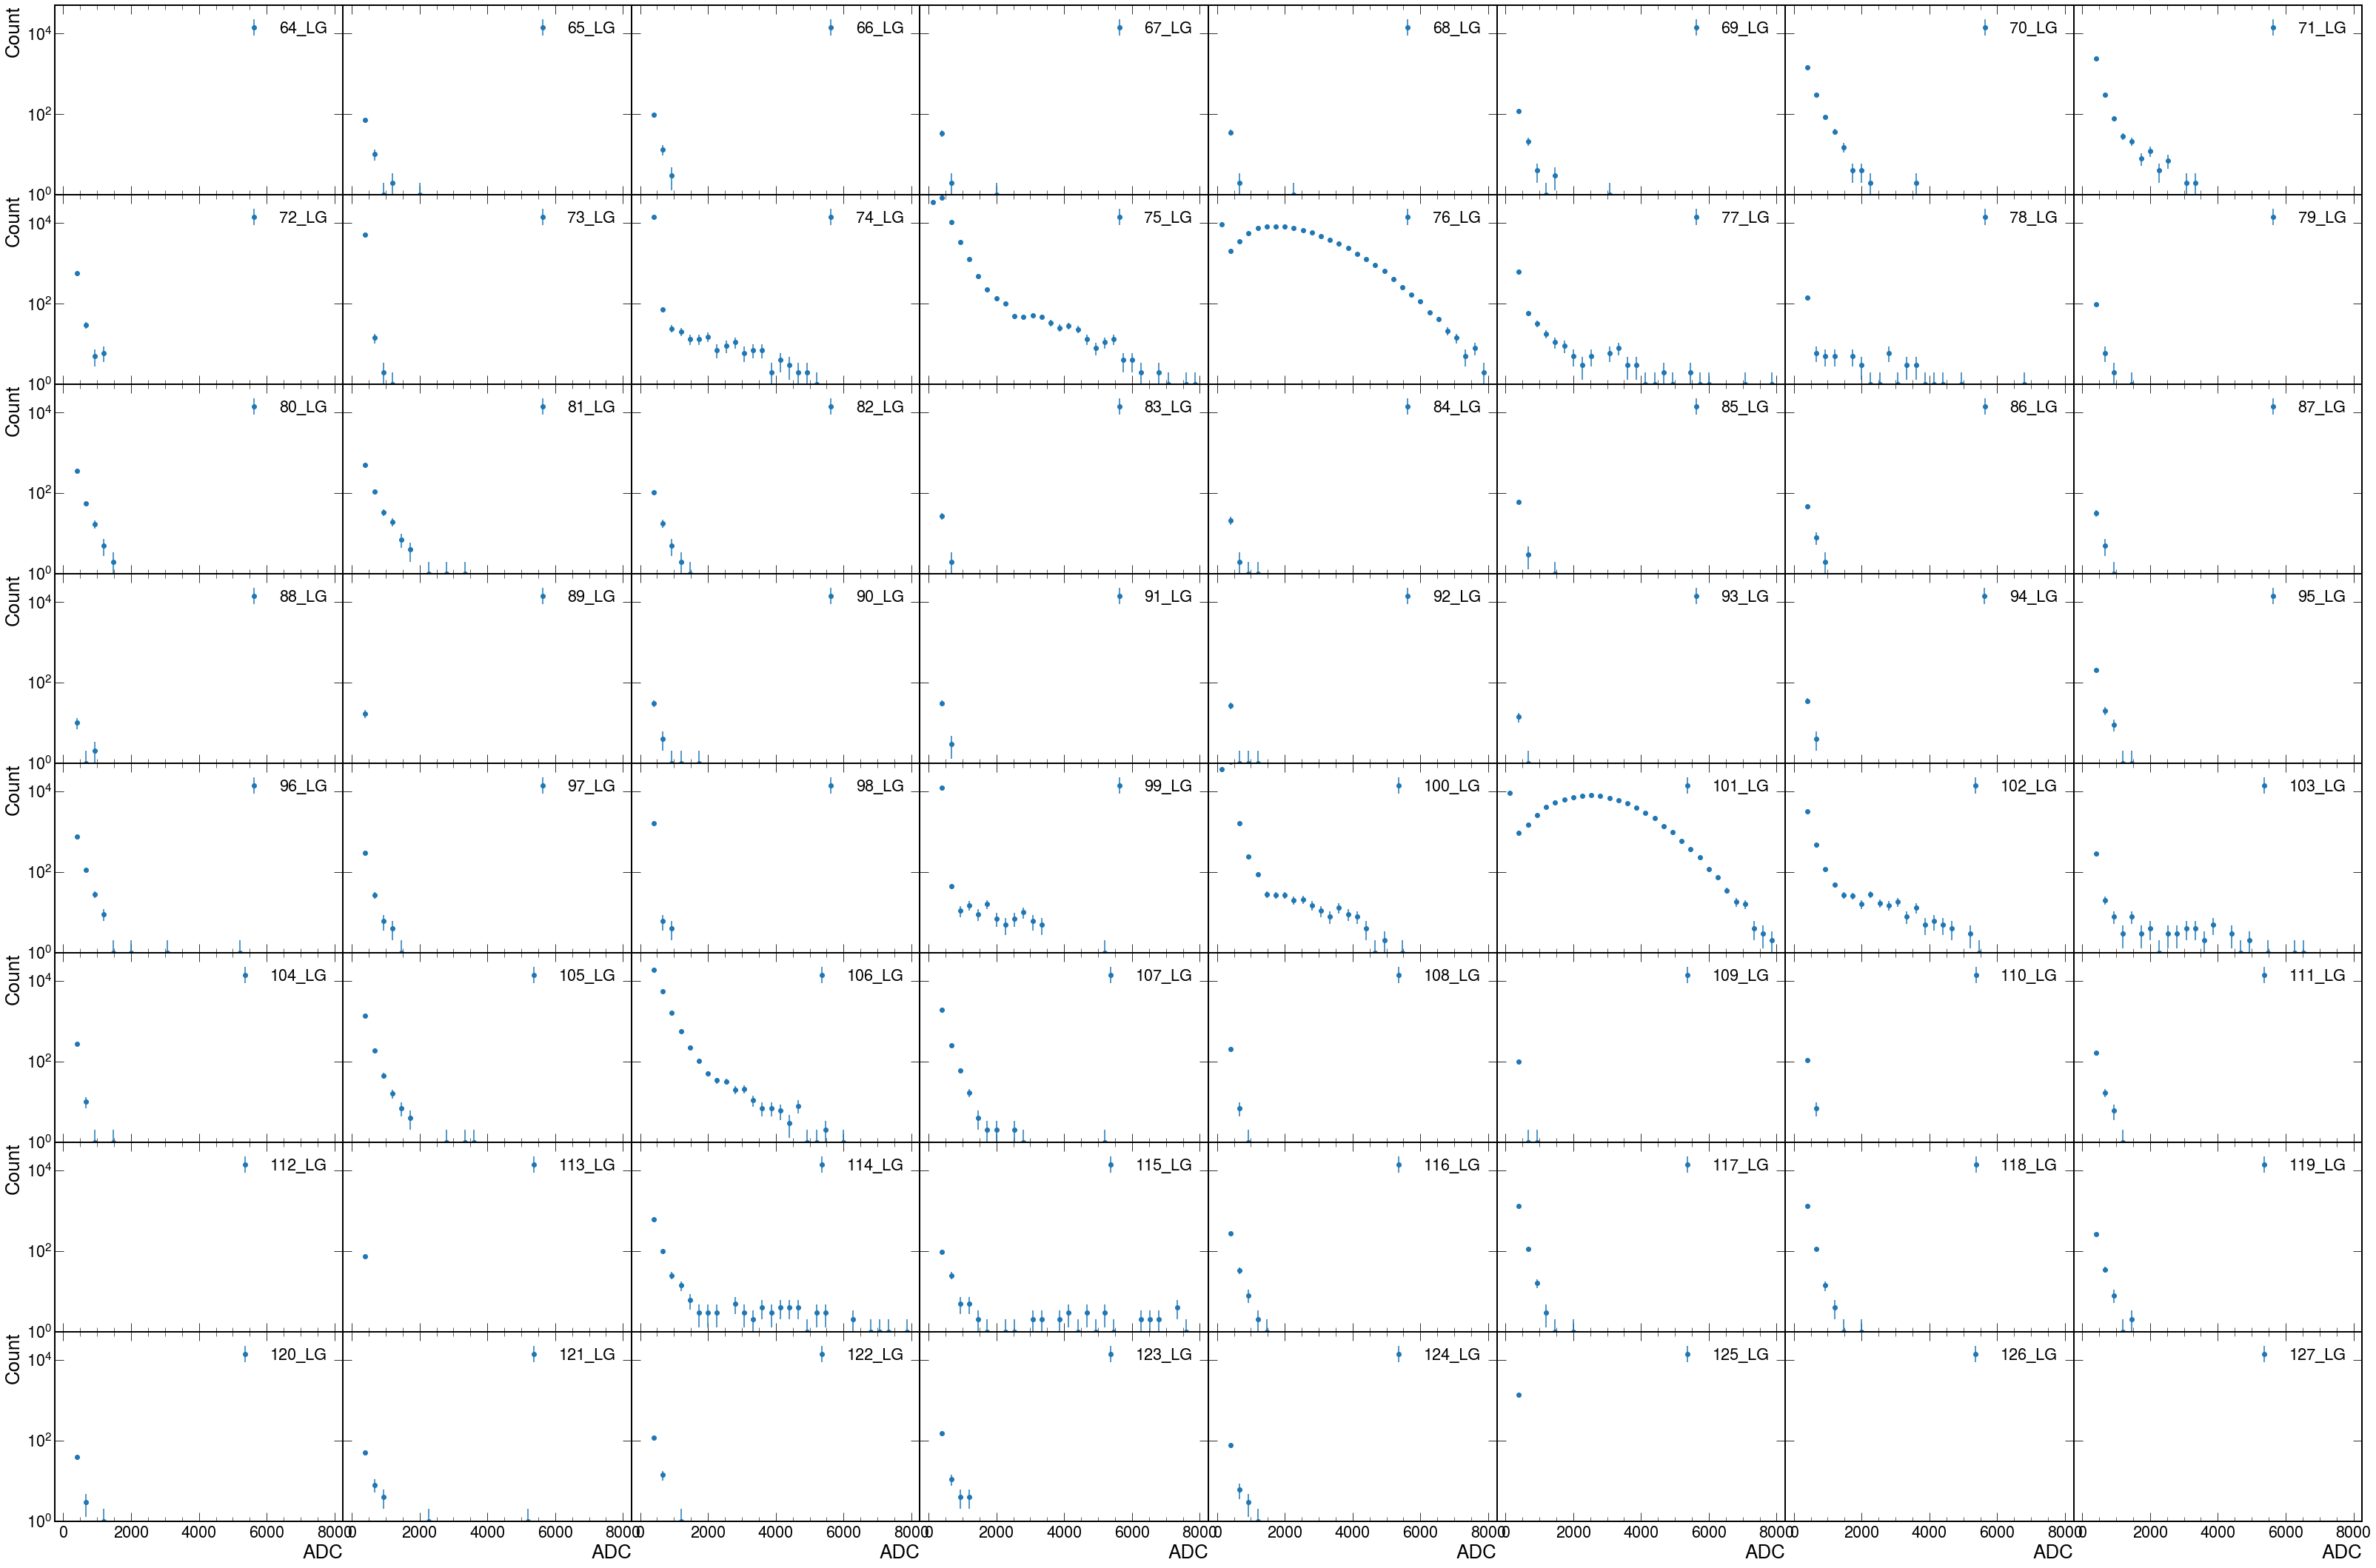

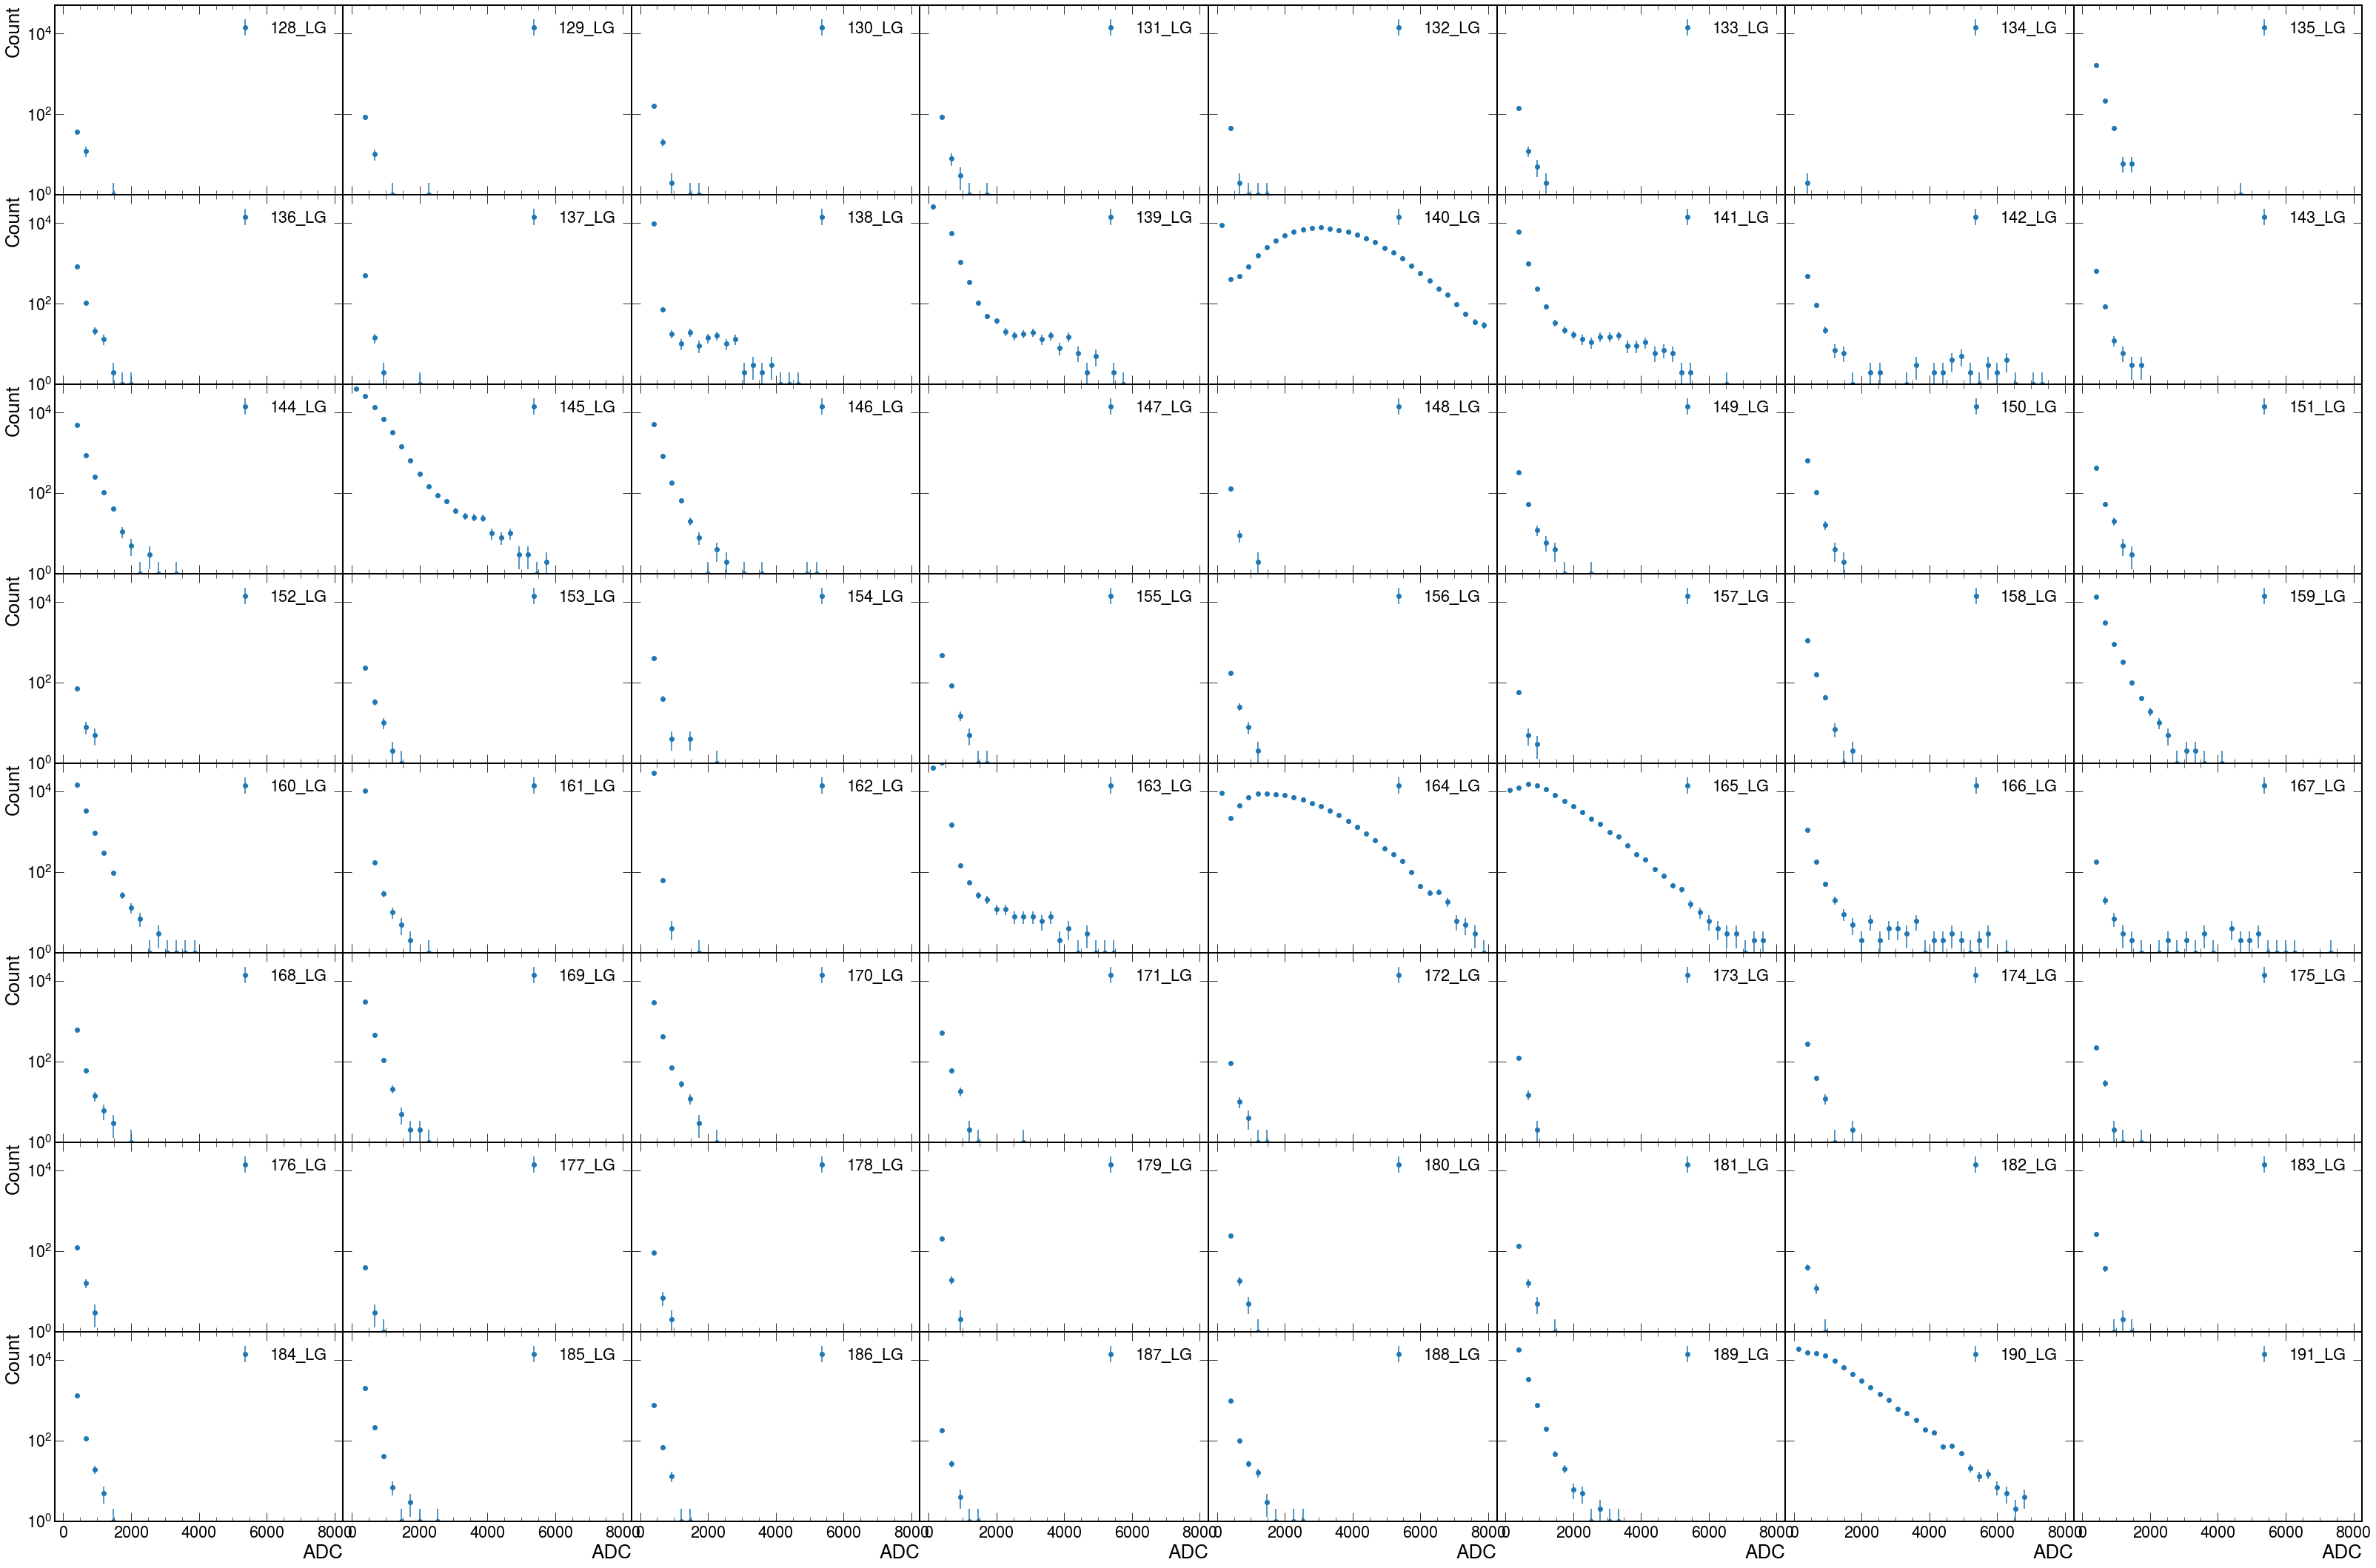

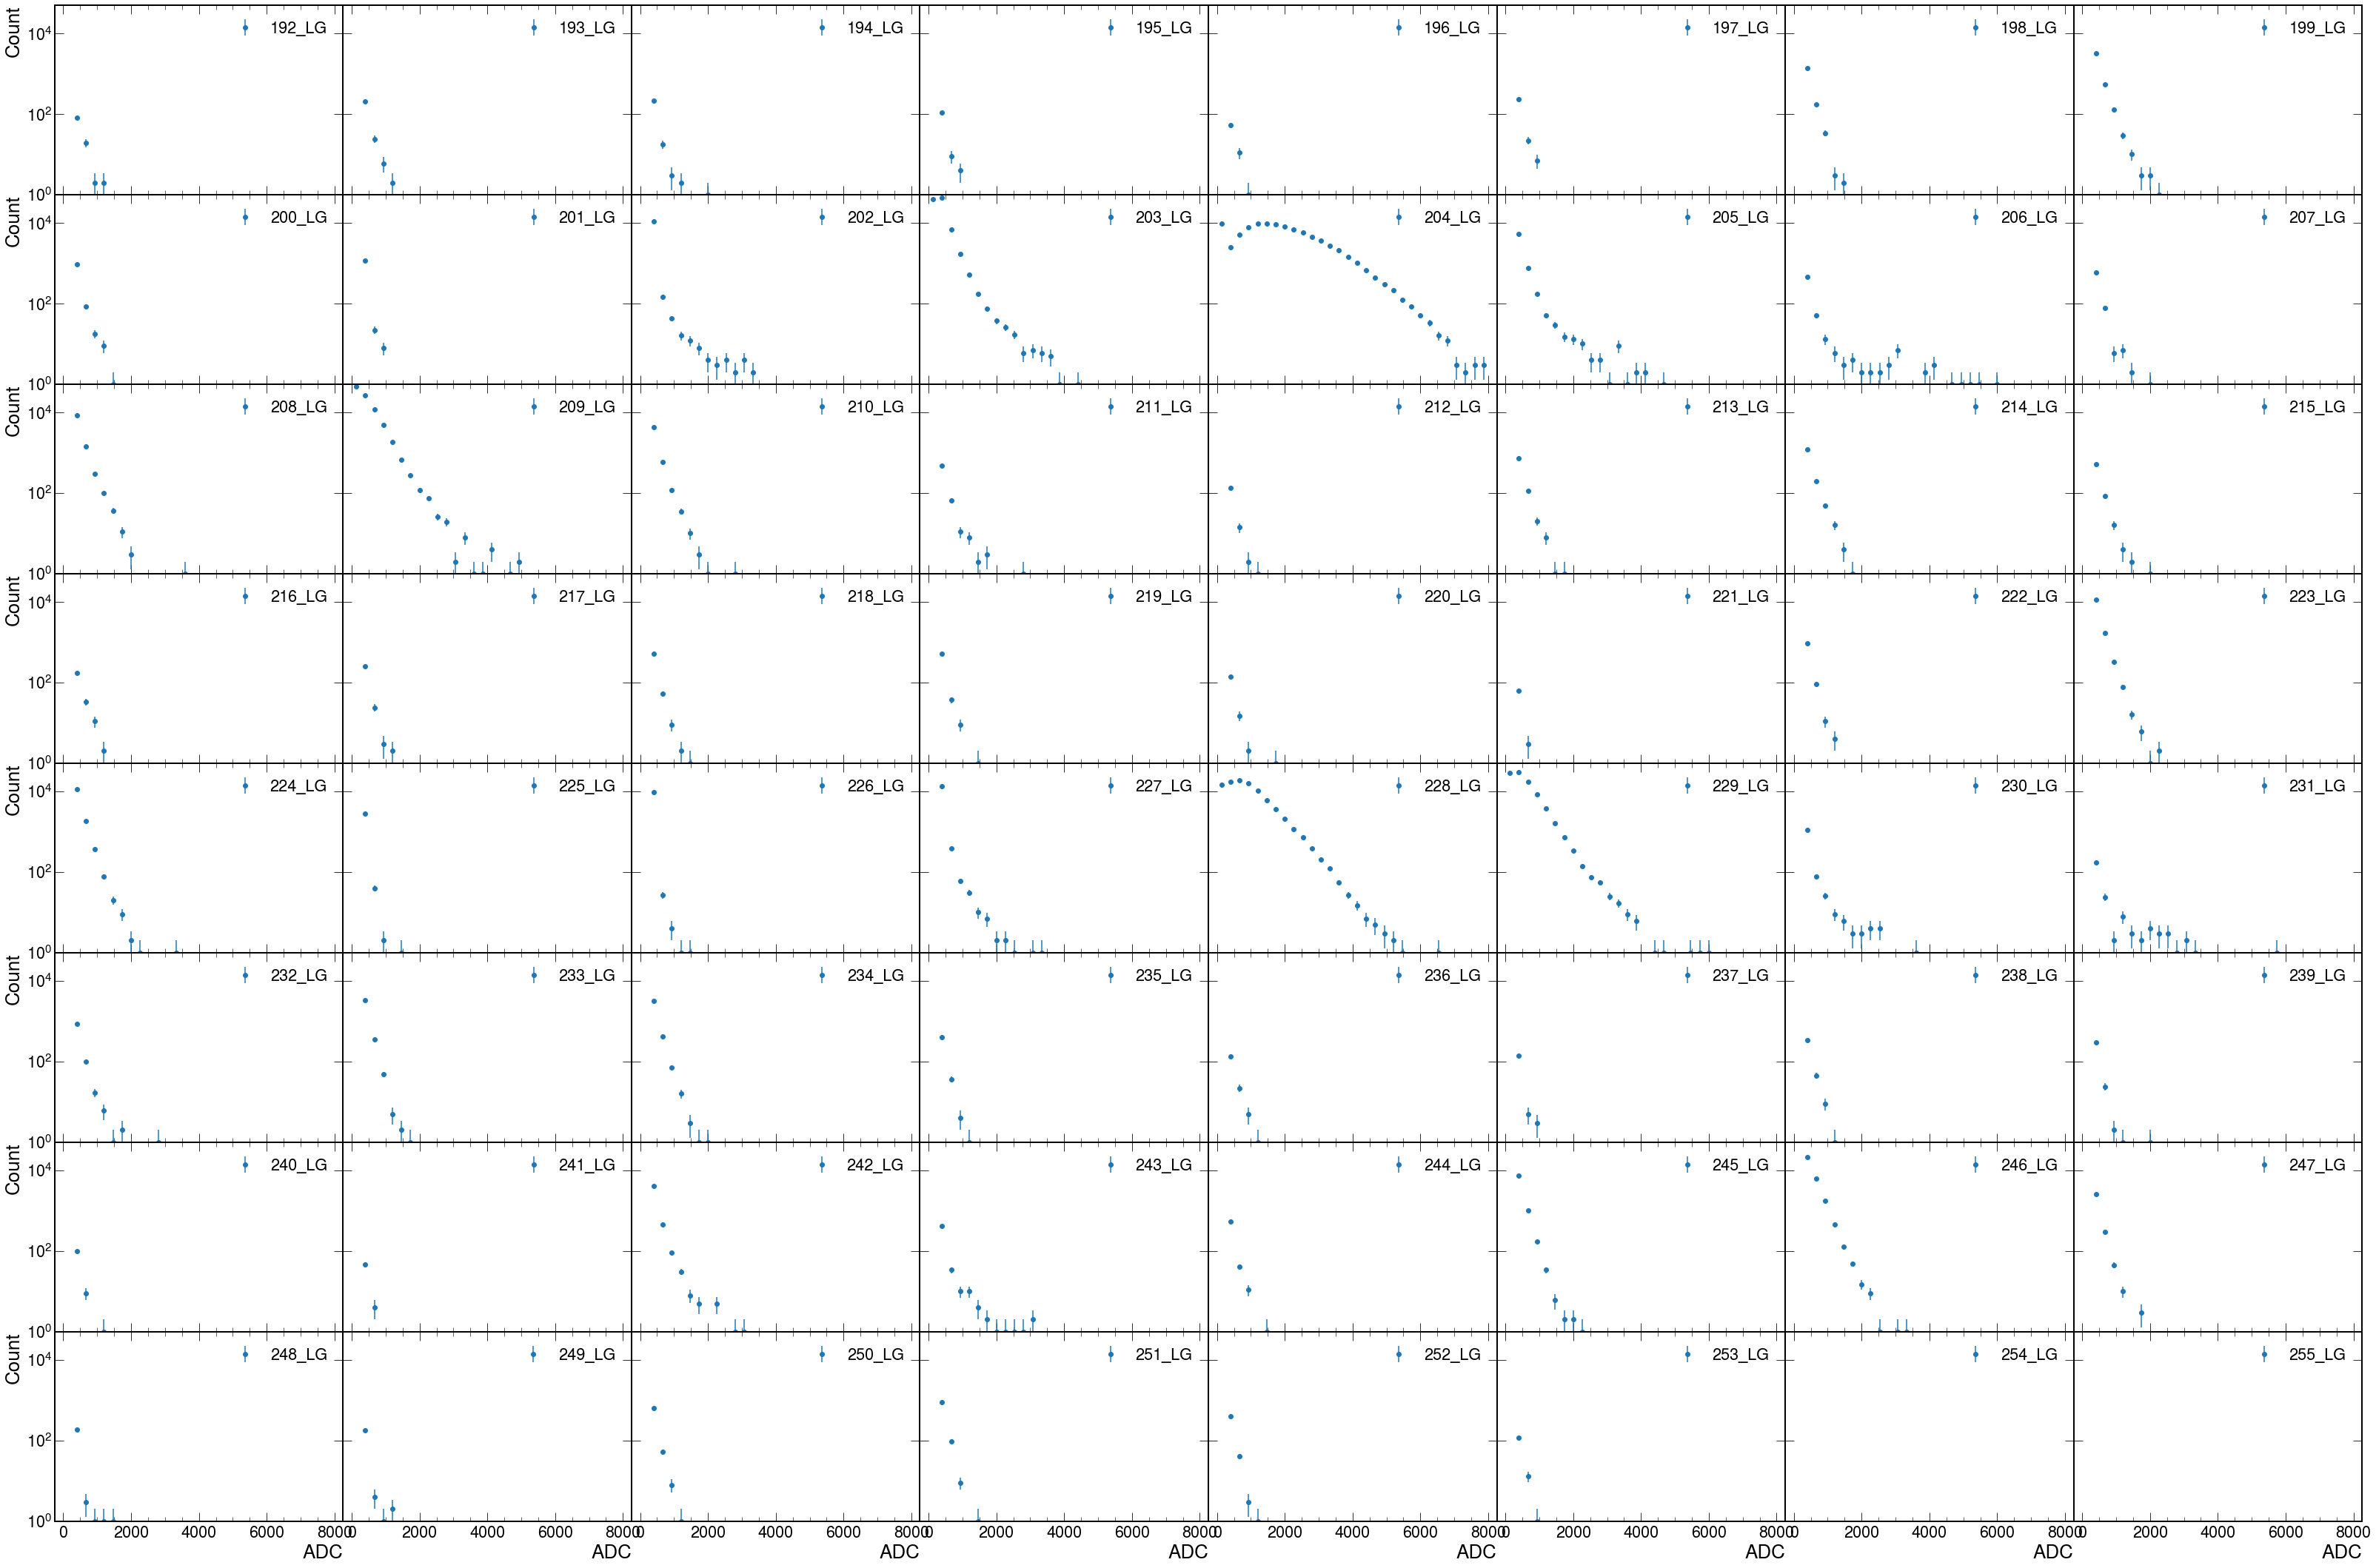

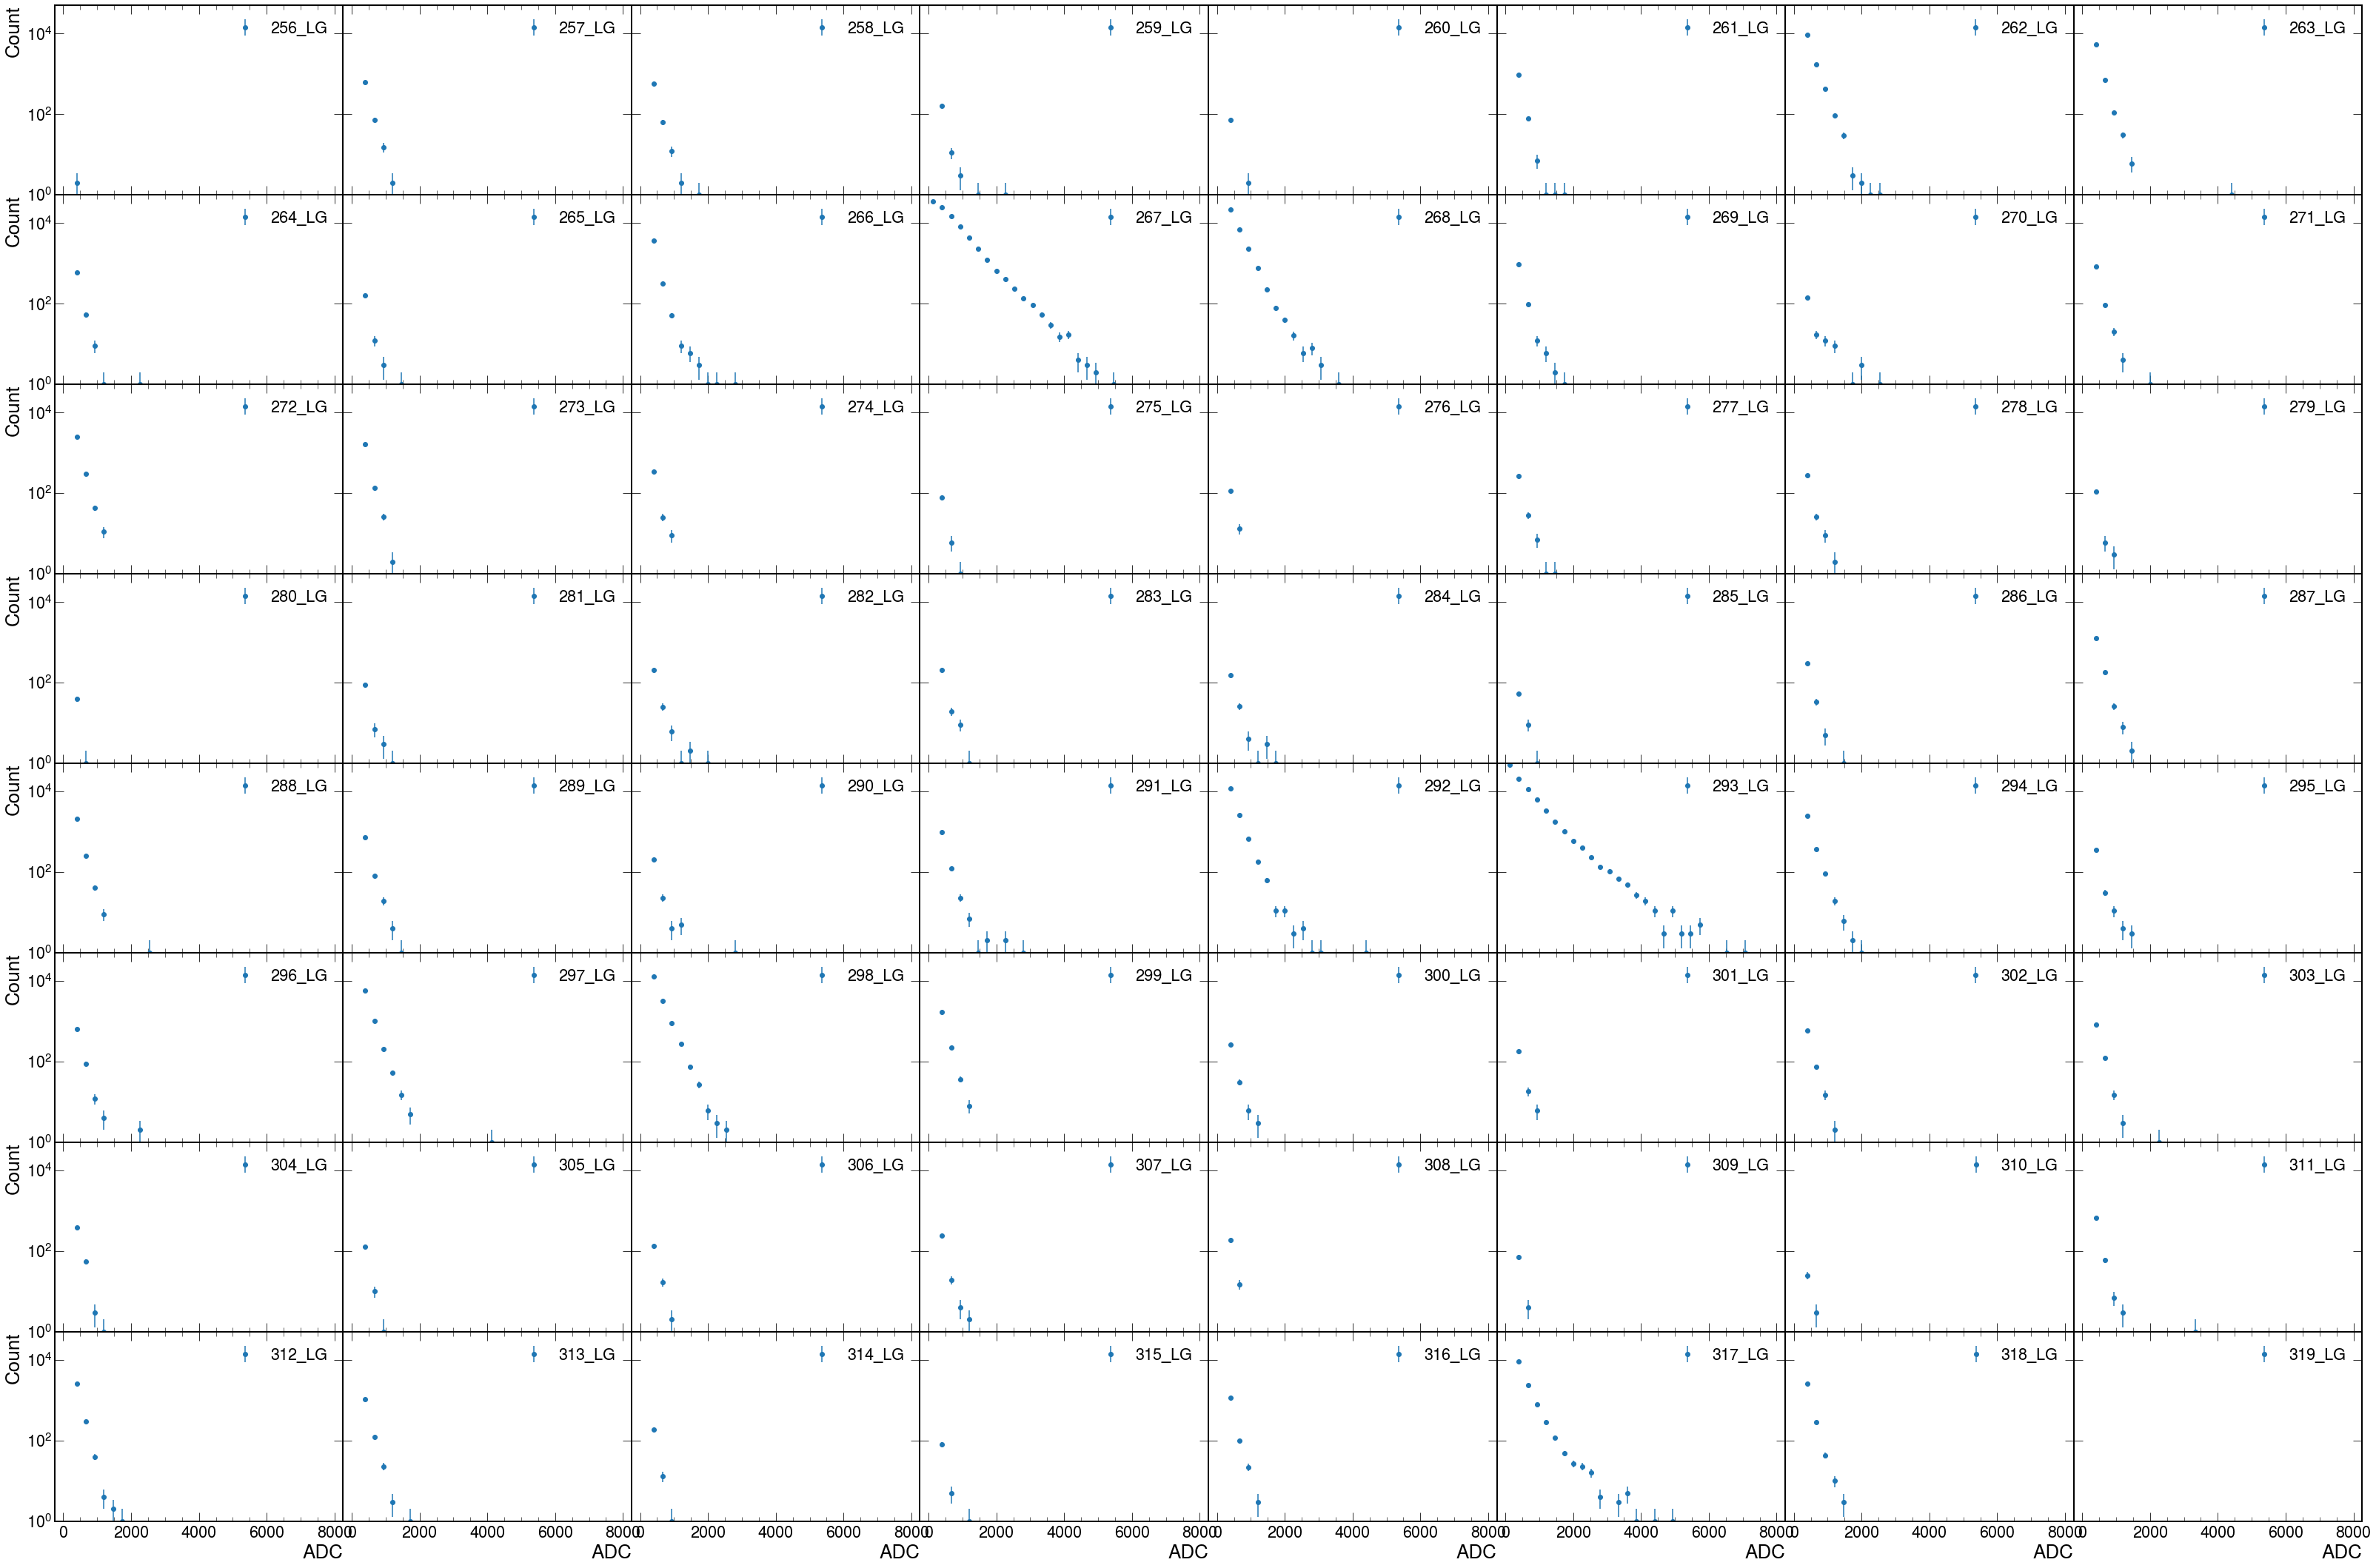

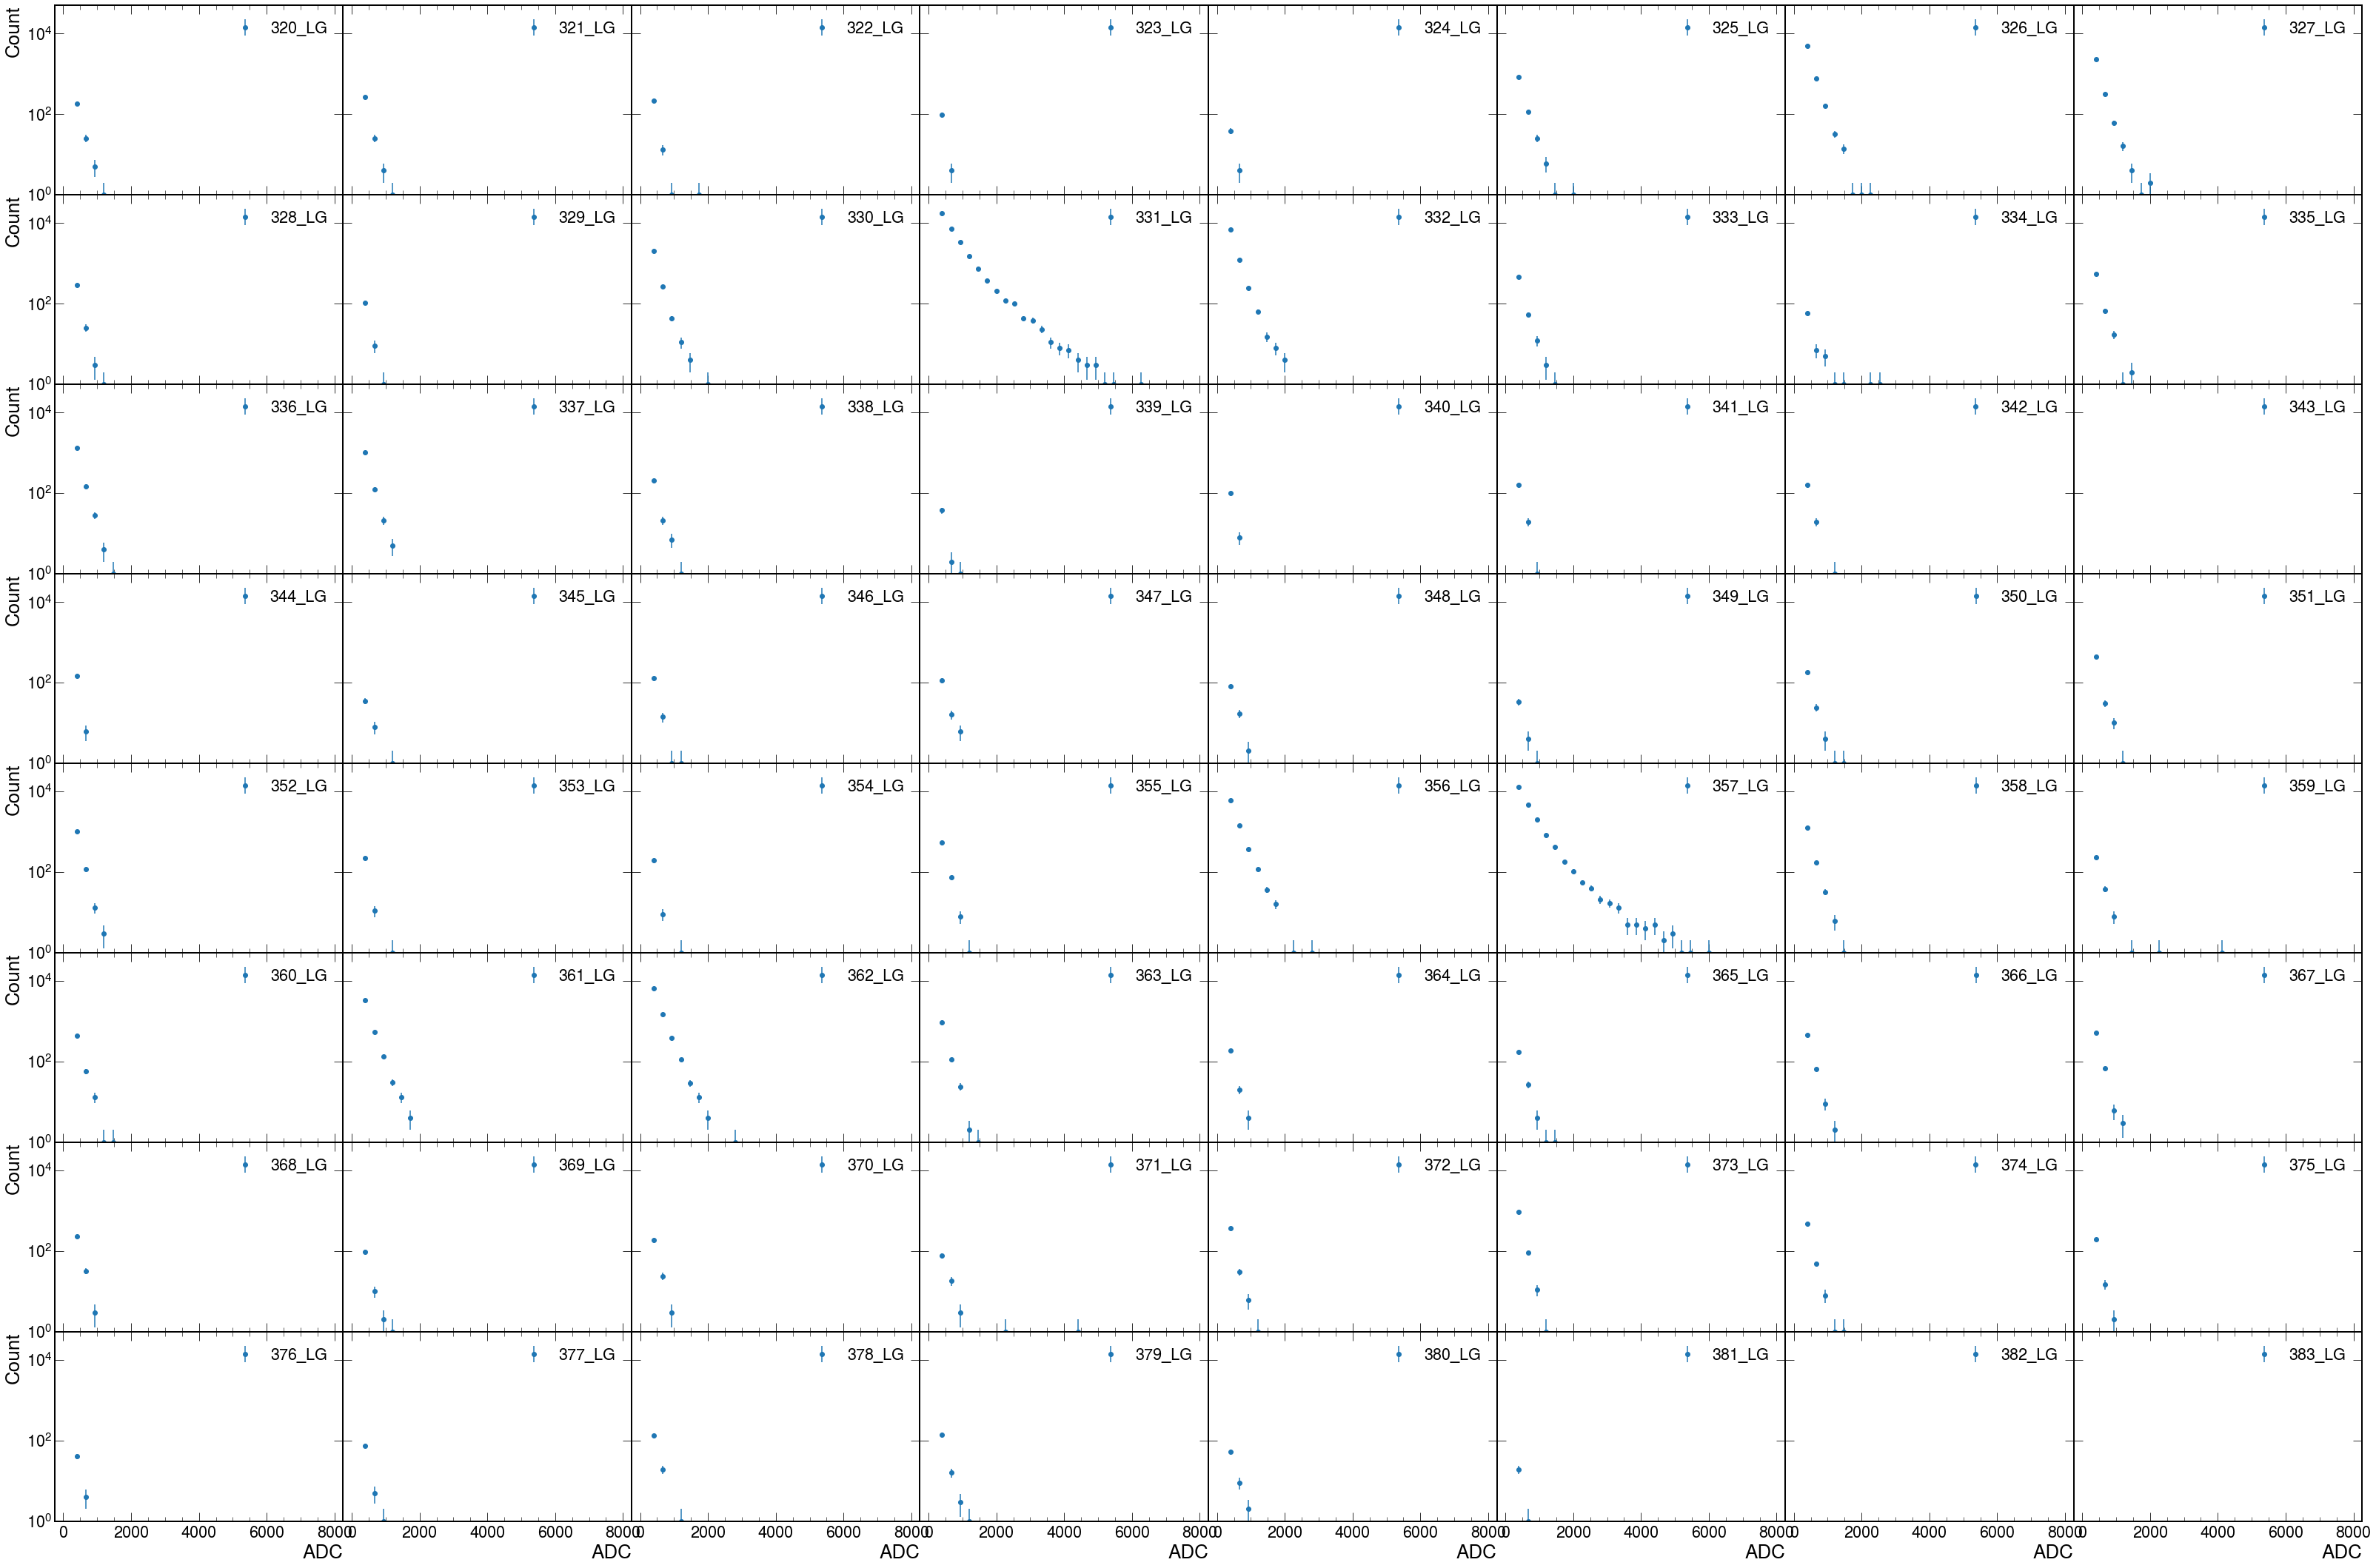

In [23]:
configure_plotting()
for unit in range(6):
    analyze_caen_unit(din, unit)